# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?type=workzone&api_key=pAVN008JKe6w3BaWr6FmH8jPFbzkAbKkv6ZpditQ')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [3]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [14]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [15]:
today_string

'2023-10-23'

In [5]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(7, 11, 3)

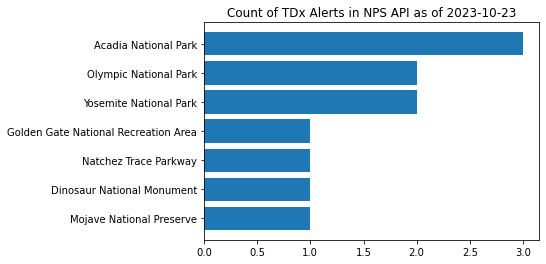

In [6]:
#create a quick summary figure


# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()


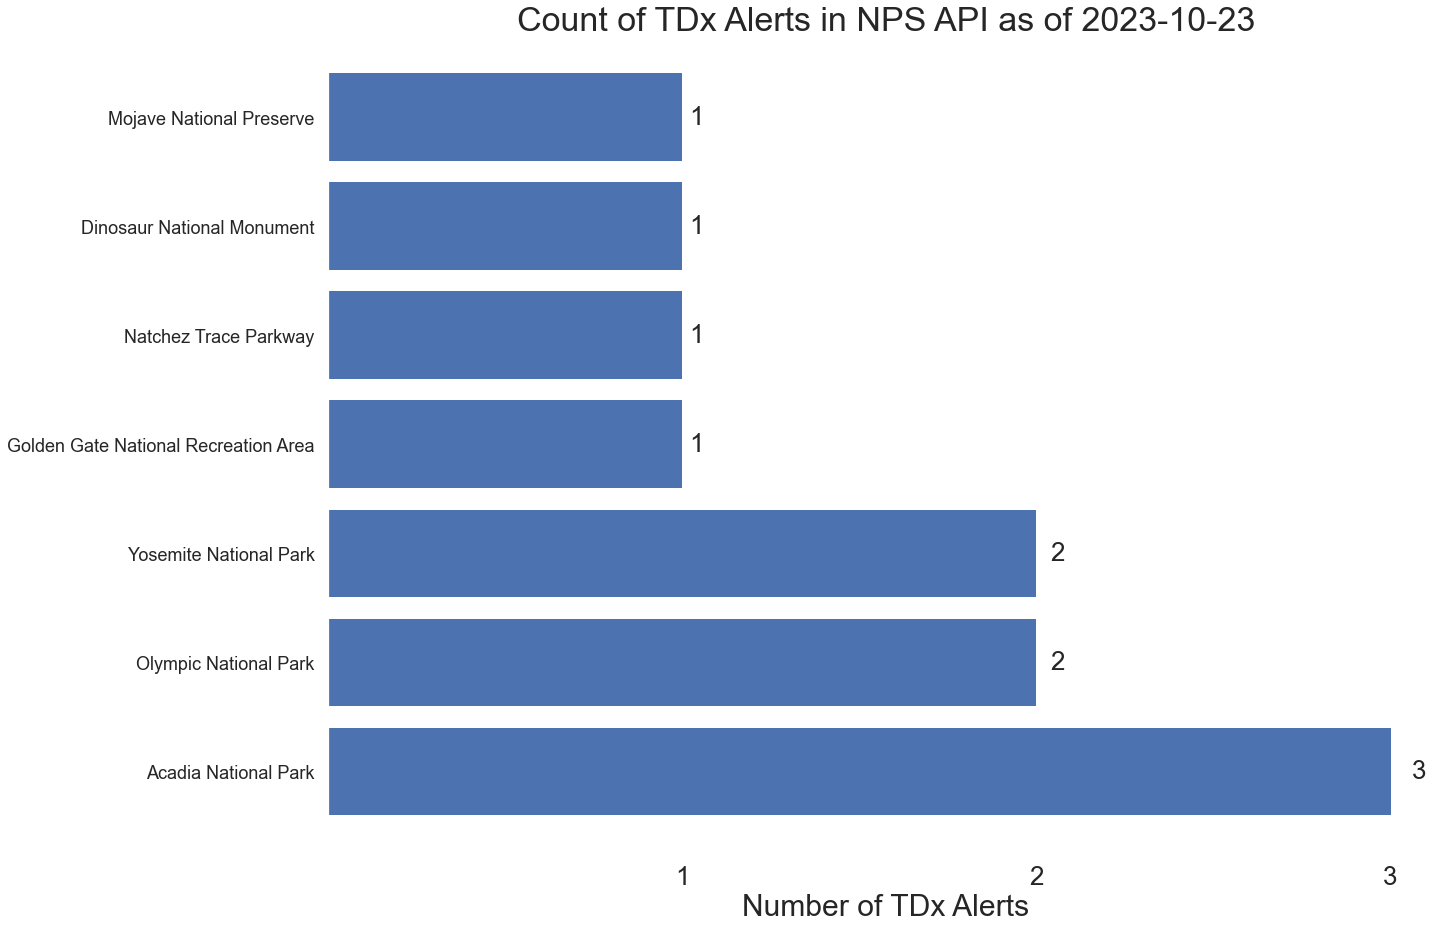

In [7]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = park_df['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = park_df['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(park_df['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [8]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Yosemite National Park
Alert name:  Mariposa Grove Road Repair
Description:  Mariposa Grove Road is closed October 16–27 for winter storm damage repairs (no shuttle or vehicle access).

Event type:  work-zone
Road name:  ['Mariposa Grove Road']
Vehicle impact:  all-lanes-closed
Dates:  2023-10-15T23:00:00Z to  2023-10-27T14:00:00Z

Park: Yosemite National Park
Alert name:  Glacier Point Road Construction
Description:  Expect 30-minute delays, Monday through Friday, 6 am to 9 pm, for road repaving and repair.
Event type:  work-zone
Road name:  ['Glacier Point Road']
Vehicle impact:  flagging
Dates:  2023-05-01T10:15:00Z to  2023-10-31T10:15:00Z

Park: Mojave National Preserve
Alert name:  Cima Road Closed to ALL VEHICLES due to Construction
Description:  Cima Road is undergoing a major renovation for visitor and wildlife safety upgrades. Please do not drive around barricades or cross this active construction zone.
Event type:  work-zone
Road name:  ['Cima Road']
Vehicle impact:  a

In [9]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "event end date": end_date_list
})

In [10]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [11]:
df_update = pd.concat([df_update, df_old_update])

In [12]:
df_update.shape

(22, 9)

In [13]:
df_update.to_csv("./TDx_tracker.csv", index=False)